## Hierarchy Clutering

- 계층적 클러스터링은 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여나가는 방법을 말한다.

## 클러스터간의 거리 측정
- 클러스터간의 비유사도(dissimilarity) 혹은 거리(distance)를 측정하는 방법에는 다음과 같은 것이 있다.
- 1) 비귀납적 방법
    - centroid: 두 클러스터의 중심점을 정의한 다음 두 중심점의 거리를 클러스터 간의 거리로 정의
    - single: 모든 조합에 대해 최소 값을 구한다. 최소 거리 방법이라고 함.
    - complete: 모든 조합에 대해 최대 값을 구한다. Farthest Point Algorithm이라고 함.
    - average: 모든 조합에 대해 평균값을 구한다.
- 2) 귀납적 방법
    - median: 클러스터 u가 클러스터 s 와 t가 결합하여 생겼다면, 클러스터 u의 중심점은 새로 계산하는 것이 아니라, 원래 두 클러스터의 중심점의 평균을 사용한다.
    - weighted: 클러스터 u가 클러스터 s와 t가 결합하여 생겼다면, 다음과 같이 원래 클러스터까지의 두 거리의 평균을 사용한다. d(u, v) = (dist(s,v) + dist(t,v))/2
    - ward: 두 클러스터의 거리의 가중 평균에서 원래의 두 클러스터 사이의 거리를 보정한 값을 사용한다.

### SciPy의 계층적 클러스터링
    - scipy.cluster.hierarchy.linkage
        - Agglomerative 방식 클러스터링
    - scipy.cluster.hierarchy.dendrogram
        - Clustering Result를 Tree 형태로 Visualized

(150, 2)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


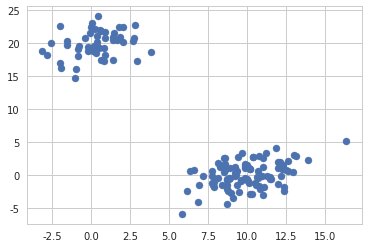

In [2]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision = 5, suppress = True)

np.random.seed(4711)       # for repeatability of this tutorial
a = np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3,1], [1,4]], size=[50,])
X = np.concatenate((a, b), )
print(X.shape)

plt.scatter(X[:, 0], X[:,1], s=50)

plt.show()

In [3]:
# Ward 방식 사용
Z = linkage(X, 'ward')

In [4]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


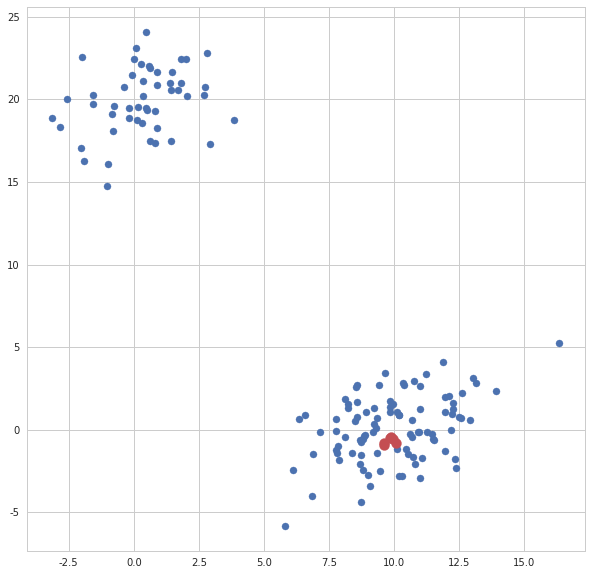

In [5]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100)
plt.show()

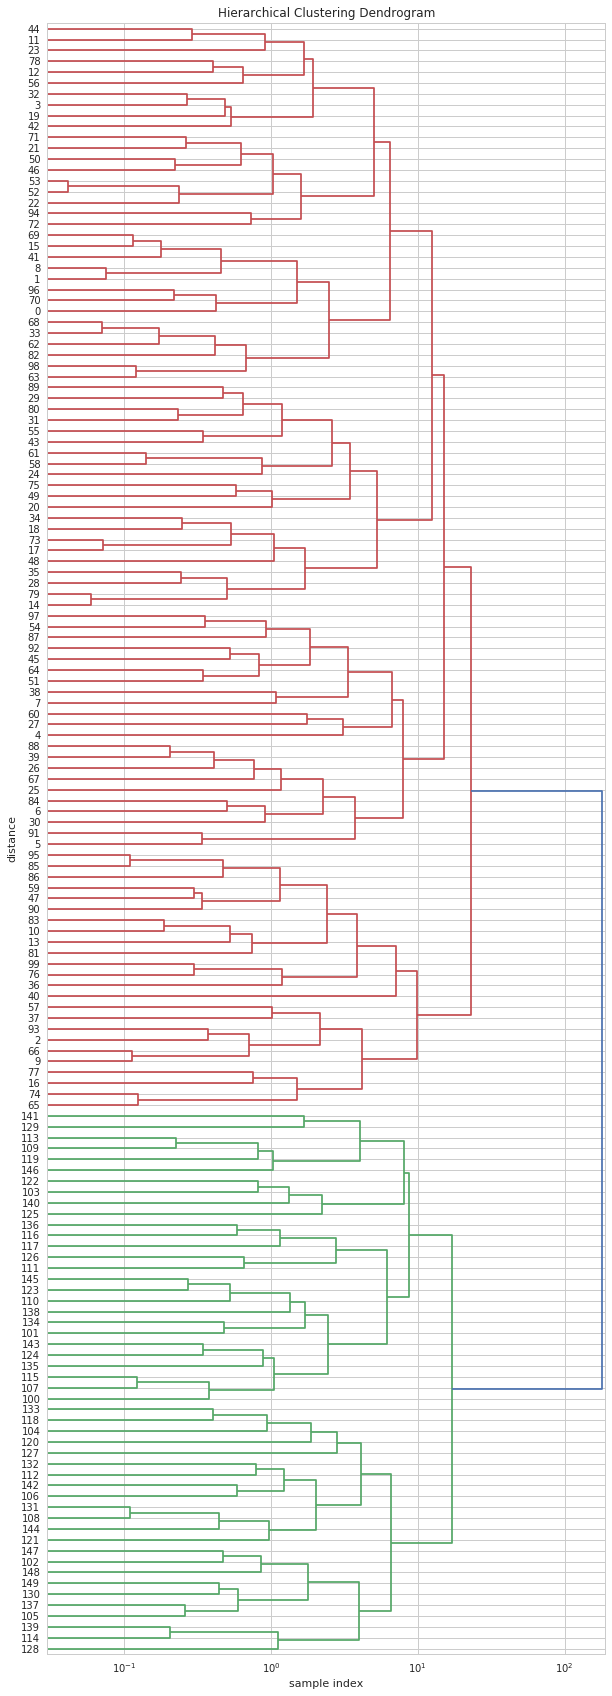

In [6]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()